# 소셜 네트워크 분석 in Python

## 1. 소셜네트워크 분석 개요

### 1-1. 소셜 미디어와 소셜 네트워크

* 스마트 디바이스의 급격한 확산 -> 소셜 미디어 등장
* **소셜 미디어**: 온라인 인맥 네트워크와 메시지 정보가 결합된 구조 -> 네트워크 관계 중요
* 사용 목적별 소셜 미디어 유형 세분화
 * 관계-소통형
 * 관계-협업형 
 * 공유-소통형 
 * 공유-협업형 
  
  
* **네트워크**: 각각의 객체들이 상호 연결된 구조
 * 구성요소: node(Node, vertex)와 링크(link, edge)
 * 노드: 고유한 속성을 가지고 있는 행위자
 * 링크: 노드들간의 관계(relation)  
ㅡ> 네트워크는 복수의 노드들이 연결된 구조  
ex, 세계 항공기 노선도, 수도권 지하철 노선도
  
### 1-2. 소셜 네트워크의 역사
* 수학 그래프 이론 -> 전산학, 생물학, 경제학, 사회학 등 여러 분야에서 적용 (+복잡계 네트워크)
  
  
* **오일러의 '쾨니히스베르크 다리 건너기 문제'** - 수학적 기초
* **모레노의 소시오 그램** - 사람들간의 상호 관계
* **바베라스와 리빗의 실험** (의사소통 패턴의 효과에 대한 실험) - 네트워크 중심성에 대한 연구 촉발
* **밀그램의 6단계 분리 이론** - 좁은 세상 효과
* **그라노베터의 '약간 연결의 강점'** - 약한 사회적 관계의 유용성에 대한 새로운 시사점, 강한 연결 네트워크들의 클러스터가 약한 연결로 연결되는 구조
* **프리만의 '중심성 지표' 개발** - 연결정도 중심성, 근접 중심성, 매개 중심성
* **버트의 '구조적 공백'** - 약한 연결 개념 구체화
* **와츠와 스트로가츠의 '좁은 세상 네트워크'** - 정규 네트워크, 무작위 네트워크, 좁은 세상 네트워크 제시, 노드 간 지름길 존재, 무척도 네트워크 밝혀지는 계기 제공
* **바라바시, 알버트, 정하웅의 '무척도 네트워크'** - 멱함수 법칙을 따르는 무척도 네트워크

## 2. 네트워크 이론 기초
### 2-1. 그래프의 기본 개념
* **그래프 이론**: 객체들 간의 네트워크 관계 모델을 수학적으로 표현된 그래프로 나타내는 연구 분야 그래프는 노드(Node, vertex)로 구성, 이러한 노드들은 링크(Link, edge)로 연결되어 있음.
 * 무방향(Undirected) 네트워크 - 책, 논문의 공저자, 네트워크, 페이스북의 친구 관계 네트워크 등
 * 방향(Directed) 네트워크 - 인터넷 주소의 하이퍼링크 네트워크, 전화통화 네트워크, 트위터의 리트윗, 팔로잉 네트워크 등  
   
   
* 관계의 정도 (강도)를 함께 표시 가능
 * 이진 네트워크: 관계의 유무만을 표현
 * 가중 네트워크: 관계의 정도를 함께 표시  
 ㅡ> 해당 링크 옆에 가중치 직접 표시 or 가중치의 정도에 따라 링크 선의 굵기 다르게 표시  
  
  
### 2-2-1. 실습 in Python
#### 모듈 가져오기

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

#### 무방향 네트워크
링크에 화살표가 없음

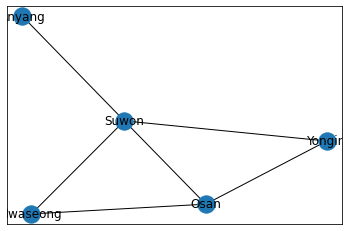

In [2]:
#객체 생성 후 노드 추가
#udn: undirected network

udn =nx.Graph() 
udn.add_node('Osan')
udn.add_node('Yongin')
udn.add_node('Hwaseong')
udn.add_node('Suwon')
udn.add_node( 'Anyang')


#엣지 추가
udn.add_edge('Osan', 'Hwaseong')
udn.add_edge('Osan', 'Yongin')
udn.add_edge('Hwaseong', 'Suwon')
udn.add_edge('Yongin', 'Suwon')
udn.add_edge('Suwon', 'Anyang')
udn.add_edge('Suwon', 'Osan')



#시각화
nx.draw_networkx(udn) 

#### 방향 네트워크
링크에 화살표가 있음

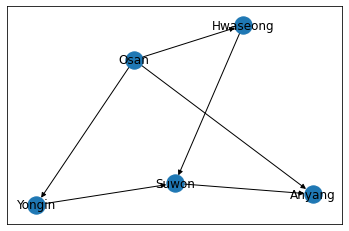

In [3]:
#객체 생성 후 엣지 추가
#dn: directed network

dn =nx.DiGraph()
dn.add_edge('Osan', 'Hwaseong')
dn.add_edge('Osan', 'Yongin')
dn.add_edge('Hwaseong', 'Suwon')
dn.add_edge('Yongin', 'Suwon')
dn.add_edge('Suwon', 'Anyang')
dn.add_edge('Osan', 'Anyang')
udn.add_edge('Suwon', 'Osan')


#시각화
nx.draw_networkx(dn)

#### 가중 네트워크
링크에 화살표가 있음

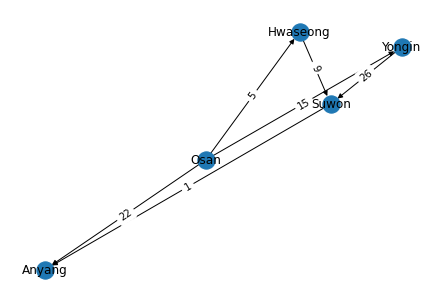

In [4]:
#객체 생성 후 노드 추가
#wn: weighted network

wn =nx.DiGraph()
wn.add_edge('Osan', 'Hwaseong', weight=5)
wn.add_edge('Osan', 'Yongin', weight=15)
wn.add_edge('Hwaseong', 'Suwon', weight=9)
wn.add_edge('Yongin', 'Suwon', weight=26)
wn.add_edge('Suwon', 'Anyang', weight=1)
wn.add_edge('Osan', 'Anyang', weight=22)
udn.add_edge('Suwon', 'Osan',weight=18)


#시각화
pos=nx.spring_layout(wn)
nx.draw(wn, pos=pos, with_labels = True)

labels = nx.get_edge_attributes(wn,'weight')
nx.draw_networkx_edge_labels(wn, pos, edge_labels = labels);

### 2-2. 그래프의 표현 방법
* **인접행렬 방식** :  
 * 인접한 노드들 간의 연결 관계를 행렬(Matrix)로 표현, 네트워크 상에서 노드의 개수가 n인 경우 인접 행렬은 nxn의 정방 행렬로 표현
 * 행과 열의 이름은 노드를 나타내며, 행과 열이 교차하는 지점의 행렬 값은 관계(link)의 유무를 1과 0으로 나타냄. 행의 이름은 링크가 출발하는 노드를 나타내고 열의 이름은 링크가 도착하는 노드를 나타낸다. 
 * 무방향 네트워크의 경우 모든 관계가 쌍방향이어서 방향성이 상쇄되는 경우와 동일하게 됨. 즉, 인접행렬은 대칭적
  
  
* **노드 리스트 방식**: 
 * 인접한 링크가 있는 노들만을 표기하는 방법 으로 노드들만의 목록
 * 맨 첫번째 열은 그래프에 존재하는 노드들의 목록을 나타낸다. 그 우측열 부터는 해당되는 그 노드에 연결된 노드의 목록을 나타낸다. 여기서 전체 행의 개수는 전체 노드의 개수와 일치하며, 노드별로 연결된 링크의 개수가 많을수록 열의 개수도 증가하게 된다. 방향성의 표시를 위해 incoming, outgoing을 구분한다.
  
  
* **엣지 리스트 방식**: 
 * 노드들을 연결한 링크들의 리스트로 “링크의 목록＂
 * 각각의 행은 링크를 통해서 연결되는 두 개의 노드 쌍으로 이루어져 있음. 따라서 리스트는 2열로만 이루어지게 되며, 행의 개수는 전체 링크의 개수와 일치하게 됨
 * 엣지 리스트에서는 그래프의 방향성을 자체적으로 구분하기 어렵기 때문에 그래프의 방향성 여부를 별도로 명시해 주어야 함.
 * 고립된 노드의 경우 링크가 존재하지 않으므로 목록에서 제외됨.
 
### 2-2. 네트워크 유형
* 링크의 방향성 유무, 가중치 유무에 따라 구분
* 관계 위상에 따라 구분
 * Ring, Mesh, Star, Fully connected, Line, Tree, Bus, Hub and Spoke
* 노드의 링크의 규모등 네트워크 크기에 따라 구분
* 분석 대상에 따라 분류
 * 전체 네트워크(완전 네트워크) vs 하위 네트워크(컴포넌트, 파당, 클러스터)
   
   
 * 파당: 모든 노드들이 상호간에 직접적으로 완전 연결 되어 있음 (3개 이상)
 * 클러스터: 유사한 속성(특성)을 기준으로 묶인 노드들의 집합
 * 에고 네트워크(자아중심 네트워크): 관심있는 노드를 중심으로 표현


#### 클러스터 

In [5]:
nx.clustering(udn, 'Osan')

0.6666666666666666

In [6]:
nx.average_clustering(udn)

0.6

#### 에고 네트워크 by BFS (너비 우선 탐색)

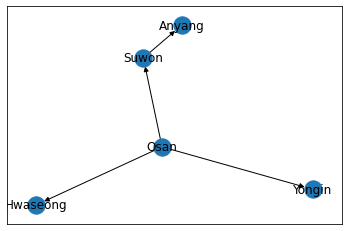

In [7]:
S = nx.bfs_tree(udn, 'Osan')
nx.draw_networkx(S)

## 3. 소셜 네트워크 분석 지표
### 3-1. 네트워크 기본 속성 분석
### 3-1-1. 네트워크 수준의 속성 분석
* **네트워크 크기**: 네트워크를 구성하는 노드들의 수
* **네트워크 밀도**: 네트워크를 구성하고 있는 노드들 간의 연결된 정도
* **포괄성**: 전체 네트워크의 밀집도를 연결된 노드의 관점에서 표현 - 네트워크상의 총 노드의 개수 중에서 실제로 연결 관계가 존재하는 노드의 개수가 차지하는 비율


### 3-1-2. 노드 수준의 속성 분석
  
  
* **연결 정도**: 해당 노드에 직접 연결되어 있는 노드들의 개수, 또는 링크의 개수
* **연결 거리**: 노드간 관계(링크)의 강도
 * 이진 네트워크(Binary network): 관계의 유무만 표시한 네트워크
 * 가중 네트워크(Valued network): 연결 관계의 강도를 상대적인 가중치를 함께 표시한 네트워크. 관계 빈도, 친밀성, 지속성, 신뢰성 등 여러가지 관계 특성을 정의 가능
 * 최단 경로거리: 두개의 특정 노드들 사이에 존재하는 다양한 연결경로 중에서 가장 적은 수의 링크 단계를 거치는 경로, 즉 가장 짧은 연결 경로
* **직경**: 네트워크 상의 모든 연결거리 중에서 가장 긴 연결거리
* **평균연결거리**: 네트워크내 모든 노드 쌍의 최단 연결거리를 산출하여 평균값을 계산한 것
  * 네트워크 임의의 두 노드가 평균적으로 최소 몇 단계의 링크를 걸쳐서 연결이 가능한지 파악

### 3-1-2-1. 실습 in Python
#### 차수


In [8]:
nx.degree(udn, 'Osan')

3

#### 최단 경로거리

In [9]:
nx.shortest_path(udn, 'Osan','Anyang') #최단 경로거리 

['Osan', 'Suwon', 'Anyang']

In [10]:
nx.shortest_path_length(udn, 'Osan','Anyang') #최단 경로거리 길이

2

### 3-1-3. 네트워크에 내재된 속성 분석
  
  
* **상호성**:
 * 상호적 연결: 방향 네트워크 상에서 2개의 노드 간의 연결이 서로 쌍방향인 경우
 * 비상호적 연결: 단반향인 경우
* **군집화 계수**: 군집화의 정도를 나타내는 지표를 뜻하며 해당 노드의 이웃 노드들 간에 가능한 최대 관계의 수 중에서 실제로 존재하는 관계의 수가 차지하는 비율로 정의
  * 군집화(Clustering): 네트워크 상에서 특정 부분의 노드들이 밀접하게 연결되어 다른 부분보다 네트워크밀도가 높아지는 현상



### 3-2. 중심성 분석

  
* 네트워크 분석 지표 중에서 일반적으로 가장 많이 사용됨
* 한 행위자가 전체 네트워크에서 중심에 위치하는 정도로 표현하는 지표
* 전체 네트워크에서 중요한 역할을 하는 노드가 무엇인지 파악 가능 -> 효율적인 정보 전달과 의사전달을 가능케함으로써 문제를 효과적으로 해결가능
  
  
* **연결정도 중심성(Degree centrality)**: 한 노드가 얼마나 많은 다른 노드들과 연결관계를 맺고 있는 지 측정
 - 노드는 다른 노드들과 많은 연결 관계를 가질수록 더 넓은 선택의 폭과 자율성을 가지게 되어 다른 노드에 대한 의존성을 상대적으로 낮춤
   
   
* **근접 중심성(Closeness centrality)**: 한 노드가 얼마나 전체 네트워크의 중심에 근접해 있는지를 측정
 - 노드가 중앙에 가깝게 위치할 수록 자원과 정보를 신속하게 전체 네트워크로 확산
 - 절대적 근접 중심성: 각각의 노드별로 해당 노드와 나머지 노드들 간의 연결거리를 합산한 역수
 - 상대적 근접 중심성: 절대적 근접 중심성에 총 노드수를 곱한 수
   
   
* **매개 중심성(Betweenness centrality)**: 한 노드가 다른 노드들 간의 네트워크 관계 형성에 있어서 중개자 혹은 매개자 역할을 얼마나 수행하는 지 측정하는 지표
 - 노드의 매개 중심성이 높을 수록 네트워크 내에서 정보 및 자원의 흐름에 있어서 높은 통제력 확보
 - 절대적 매개중심성: 네트워크 내의 모든 노드 쌍의 최단 경로 중에서 노드 i가 포함되어 있는 경로의 비율로 정의
 - 상대적 매개중심성: 절대적 매개 중심성 값을 이론상 가능한 매개 중심성 최댓값으로 나누어 계산
   
   
* **아이겐 벡터 중심성(Eigenvector centrality)**: 직접 연결된 노드들의 개수 뿐만 아니라 연결된 다른 노드들의 중요도를 함께 반영한 것
 - 네트워크 상에서 소수 몇몇 영향력 높은 노드들(중심성이 높은 노드들)에 연결되어 있는 것이 다수의 일반 노드들에 연결되어 있는 것보다 더 큰 영향력을 가짐
 - 친구가 많은 것도 중요하지만 중요한 친구가 많은 지를 보고자 할 때 사용하는 지표임

### 3-2-1. 실습 in Python
#### 연결정도 중심성

In [11]:
nx.degree_centrality(udn)

{'Osan': 0.75, 'Yongin': 0.5, 'Hwaseong': 0.5, 'Suwon': 1.0, 'Anyang': 0.25}

#### 근접 중심성

In [12]:
nx.closeness_centrality(udn)

{'Osan': 0.8,
 'Yongin': 0.6666666666666666,
 'Hwaseong': 0.6666666666666666,
 'Suwon': 1.0,
 'Anyang': 0.5714285714285714}

#### 매개 중심성

In [13]:
nx.betweenness_centrality(udn)

{'Osan': 0.08333333333333333,
 'Yongin': 0.0,
 'Hwaseong': 0.0,
 'Suwon': 0.5833333333333333,
 'Anyang': 0.0}

#### 아이겐 벡터 중심성

In [14]:
nx.eigenvector_centrality(udn)

{'Osan': 0.5236826290621273,
 'Yongin': 0.4119170973700677,
 'Hwaseong': 0.4119170973700677,
 'Suwon': 0.5825392535755105,
 'Anyang': 0.21691733875073668}

## 4. 네트워크 그래프 그리기 응용 실습 
### 1) 제공 데이터 사용 (subway data)

In [15]:
#데이터 불러오기
subway = pd.read_csv('C:/Users/user/Downloads/subway(1).csv', encoding='cp949')
nodes=subway
links=subway
links=links[['from','to']]

Name: 
Type: Graph
Number of nodes: 605
Number of edges: 689
Average degree:   2.2777


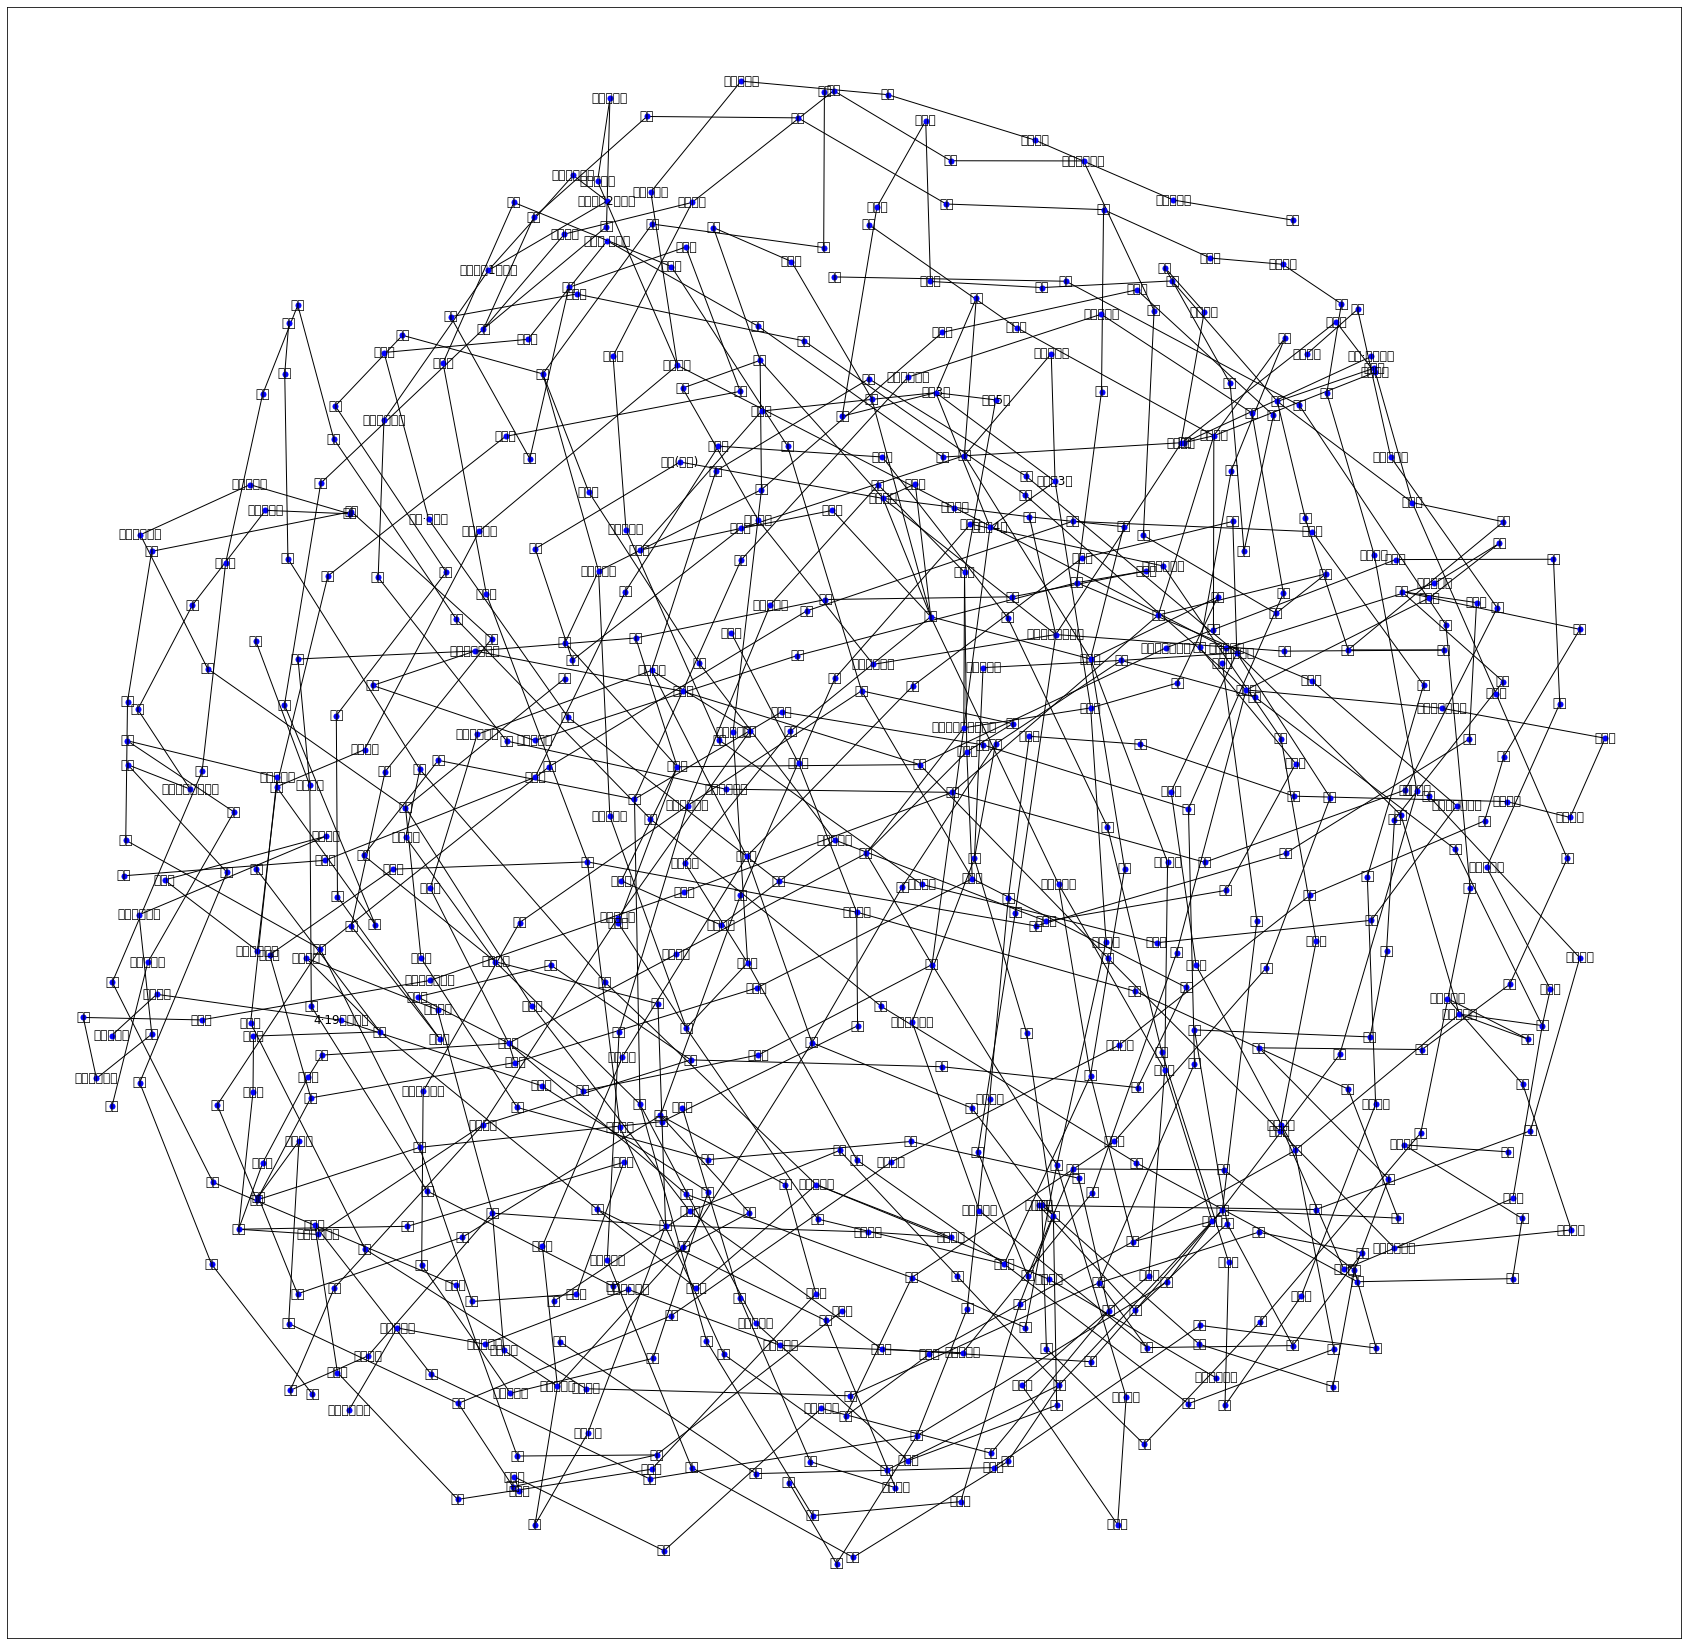

In [16]:
#시각화
sub= nx.Graph()
sub = nx.nx.from_pandas_edgelist(subway, source = 'from', target = 'to')
print(nx.info(sub))

plt.figure(figsize=(30,30))
pos = nx.spring_layout(sub, k = 0.15)
nx.draw_networkx(sub,pos, node_size = 25, node_color = 'blue')
plt.show()

Name: 
Type: Graph
Number of nodes: 609
Number of edges: 688
Average degree:   2.2594


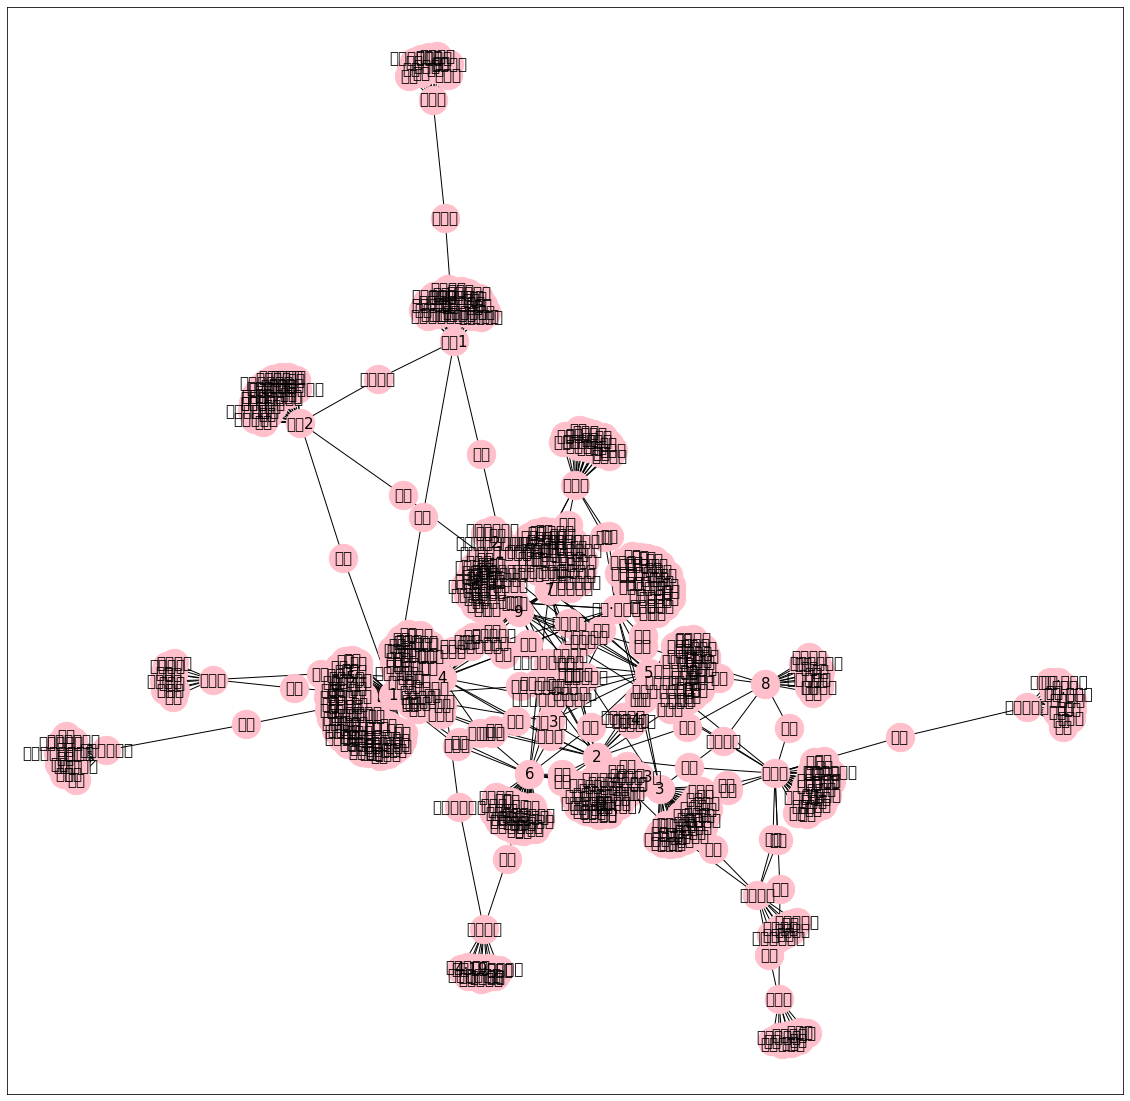

In [17]:
#호선 별 연관 그래프

sub_all= nx.Graph()
lines=subway['line']
sub_all = nx.from_pandas_edgelist(subway,source='from',target='line')
print(nx.info(sub_all))
nx.Graph()
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(sub_all, k=0.0319)
nx.draw_networkx(sub_all,pos,node_size=805, node_color='pink', font_size=15)
plt.show()

## 5. 소셜 네트워크 분석 도구 및 분석 사례

### 5-1. 소셜 네트워크 분석 도구

* NodeXL
* UCINET
* Pajek
* NetMiner
* Gephi

### 5-2. 소셜 네트워크 분석 사례

* 하이퍼 링크 네트워크 분석
* 트위터 네트워크 분석
* 트위터 예고 네트워크 분석
* 유튜브 동영상 네트워크 분석
* 페이스북 네트워크 분석
* 의미 네트워크 분석

#### 강의자료 외 참고자료
https://www.kirenz.com/post/2019-08-13-network_analysis/
https://95pbj.tistory.com/34



